In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [ ]:
def EXPN(dt,al):
    temp = 0
    fil = []
    for d in dt:
        f = al*d + (1 - al)*temp
        fil.append(f)
        temp = f
    return fil

In [1]:
def Bode(sig_in,sig_out):
    Fs = 100
    L = len(sig_in)
    NFFT = 2**math.ceil(math.log2(L))
    f = (Fs / 2) * np.linspace(0, 1, NFFT // 2 + 1)
    Yin = np.fft.fft(sig_in, NFFT)
    Yin = Yin[:NFFT // 2 + 1]
    Y = np.fft.fft(sig_out, NFFT)
    Y = Y[:NFFT // 2 + 1]
    OutImp_BodeAm_dB = 20 * np.log10(np.abs(Y / Yin))
    OutImp_BodePh = np.angle(Y / Yin, deg=True)
    window_size = 50
    OutBand_BodeAm_dB = pd.Series(OutImp_BodeAm_dB).rolling(window=window_size, min_periods=1).mean()
    OutBand_BodePh = pd.Series(OutImp_BodePh).rolling(window=window_size, min_periods=1).mean()

    OutBand_BodeAm_dB = OutBand_BodeAm_dB.to_numpy()
    OutBand_BodePh = OutBand_BodePh.to_numpy()
    return f,OutBand_BodeAm_dB,OutBand_BodePh


In [ ]:
# read data
file_path = "h3Data5_1.txt"
# Open the file in read mode
with open(file_path, "r") as file:
    # Read the contents of the file
    filecontent = file.read()
content = filecontent.split("\n")
t = range(6001)
dT = 1/100

In [ ]:
data = []
for i in range(len(content)):
    c = content[i].split("]")[:-2]
    entry = []
    for j in range(len(c)):
        if j == 0:
            row = c[j][2:].split(",")
        else:
            row = c[j][3:].split(",")
        for r in row:
            entry.append(float(r))
    data.append(entry)

In [ ]:
ndata = np.array(data)
dt = np.reshape(ndata,(6,4,6001))

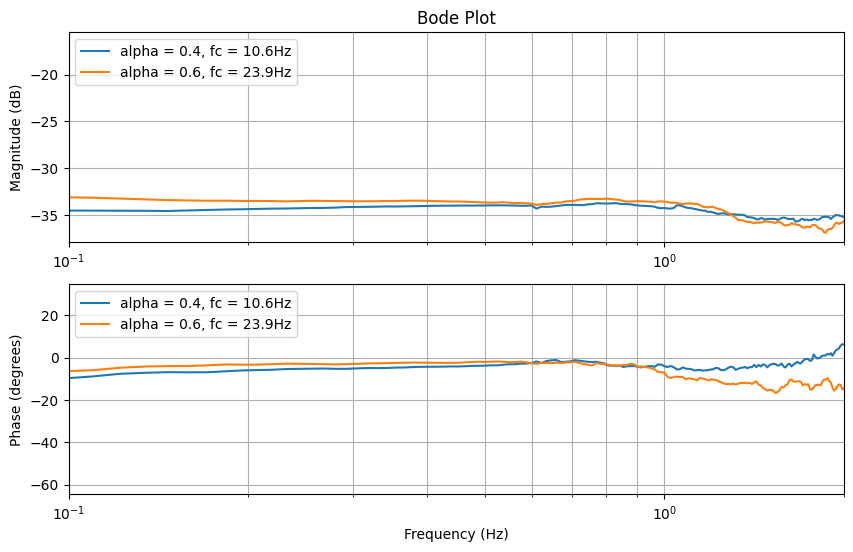

In [ ]:
lsf = []
lsa = []
lsd = []

for i in range(len(dt)):
    fil = dt[i][1]
    vel = dt[i][3]
    f,a,d = Bode(fil,vel)
    lsf.append(f)
    lsa.append(a)
    lsd.append(d)


freq4 = sum(lsf[:3])/3
amp4 = sum(lsa[:3])/3
deg4 = sum(lsd[:3])/3
freq6 = sum(lsf[3:])/3
amp6 = sum(lsa[3:])/3
deg6 = sum(lsd[3:])/3


label = ["alpha = 0.4, fc = 10.6Hz","alpha = 0.6, fc = 23.9Hz"]

# Plot the Bode plot
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.semilogx(freq4, amp4)
plt.semilogx(freq6, amp6)
plt.xlim(0.1,2)
plt.ylabel('Magnitude (dB)')
plt.grid(which='both', axis='both')
plt.legend(label,loc="upper left")
plt.title("Bode Plot")

plt.subplot(2, 1, 2)
plt.semilogx(freq4, deg4)
plt.semilogx(freq6, deg6)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (degrees)')
plt.xlim(0.1,2)
plt.grid(which='both', axis='both')
plt.legend(label,loc="upper left")

plt.show()

In [ ]:
# Individual Plot
def indPlot(trial):
    fr,am,de = Bode(dt[trial][1],dt[trial][3])
    unfil = dt[trial][0]
    fil = dt[trial][1]
    if trial > 2:
        alpha = .6
    else:
        alpha = .4

    plt.figure(figsize=(12, 6))
    plt.subplot(3, 1, 1)
    plt.semilogx(fr, am)
    plt.xlim(0,2)
    plt.ylabel('Magnitude (dB)')
    plt.grid(which='both', axis='both')
    plt.title(f"Bode Plot: trial {trial+1}, alpha {alpha}")

    plt.subplot(3, 1, 2)
    plt.semilogx(fr, de)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Phase (degrees)')
    plt.xlim(0,2)
    plt.grid(which='both', axis='both')
    plt.legend(label,loc="lower left")

    plt.subplot(3,1,3)
    plt.plot(t,unfil)
    plt.plot(t,fil)
    plt.ylabel("Torque (Nm)")
    plt.xlabel("Timestamp")

    plt.show()

<ipython-input-16-cf117fe6d708>:14: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,2)
<ipython-input-16-cf117fe6d708>:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,2)


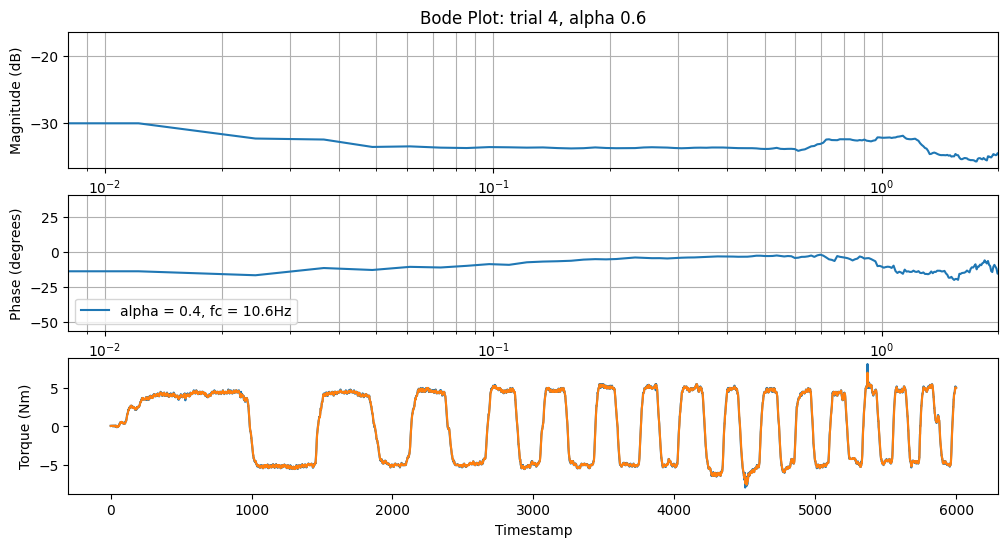

In [ ]:
indPlot(3)